In [1]:
%matplotlib inline
import numpy as np
from numpy import random
import random
import math
import matplotlib.pyplot as plt
from operator import add
import itertools
from tqdm import tqdm
import nest
from scipy.stats import norm


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Oct 15 2023 15:12:16

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [8]:
import os
import sys
Path = os.getcwd()
sys.path.append(Path)
from utilities import *

In [9]:
facecolor = "#F5F5F5"
color = "#006D5B"

In [10]:
import math 


def calculate_SD(f, tau_si, C_m_si, Vm_SD, delta):
    SD_si = math.sqrt( (2 * C_m_si**2 * Vm_SD**2) / (delta * tau_si ))
    SD = SD_si / (1e-12)
    return SD

SD = calculate_SD(f=10, tau_si=10*1e-3, C_m_si=100*1e-12, Vm_SD=4.0*1e-3, delta=1e-3)
print(f"Resolution = 1.0 ms. SD I_noise: {SD:.2f} pA")

SD = calculate_SD(f=10, tau_si=10*1e-3, C_m_si=100*1e-12, Vm_SD=4.0*1e-3, delta=5e-4)
print(f"Resolution = 0.1 ms. SD I_noise: {SD:.2f} pA")

Resolution = 1.0 ms. SD I_noise: 178.89 pA
Resolution = 0.1 ms. SD I_noise: 252.98 pA


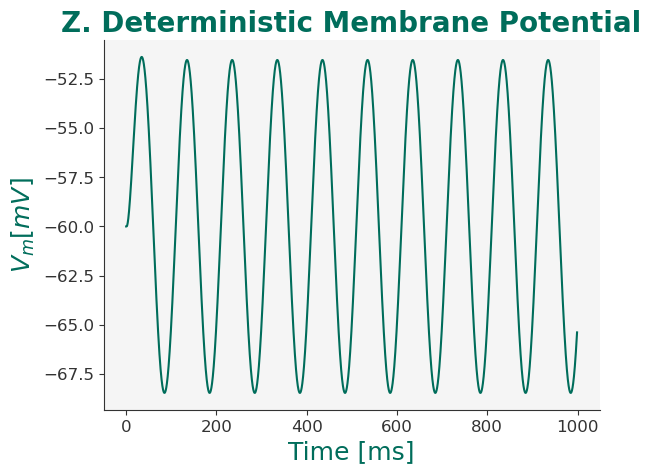

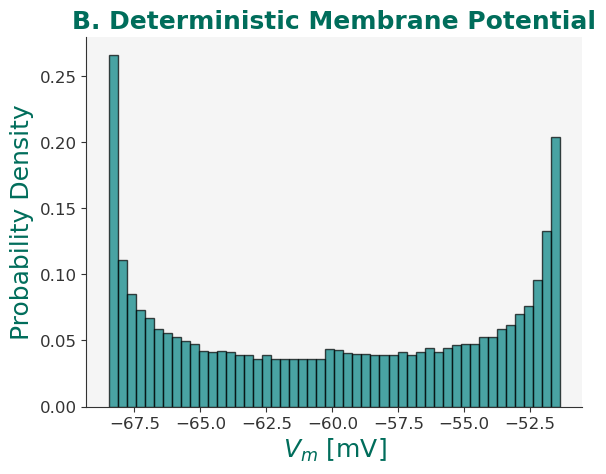

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


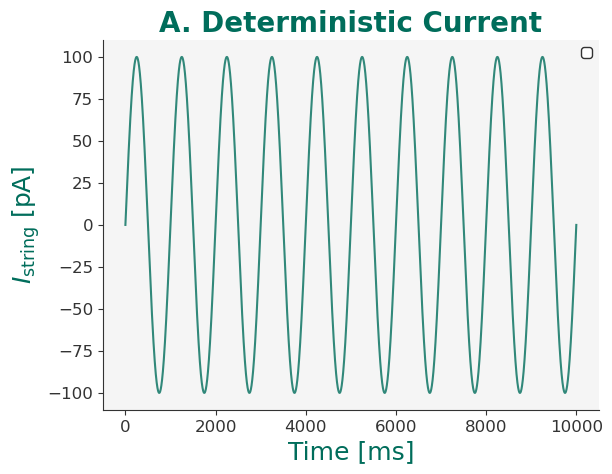

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Lekkasjeledning g_L: 10.0000 nS


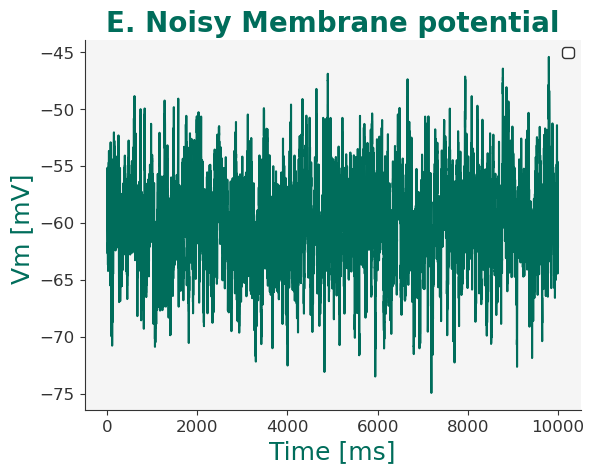

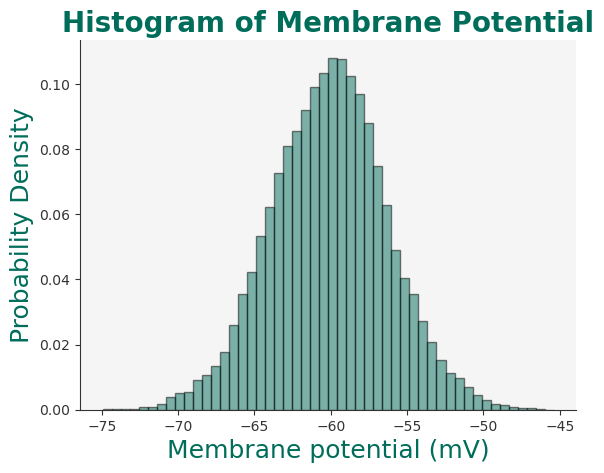

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Probability density of Membrane potential is somewhat left-skewed.
This is due to the fact that the membrane potential is reset when threshold V_th is reached.
When the potential reaches -55mV the potential is reset, and the distribution gets cut off
The potential is then reset to V_reset and only goes slightly below this if noise current is negative
({'dt': 1.0, 'element_type': 'stimulator', 'frequency': 0.0, 'frozen': False, 'global_id': 5, 'label': '', 'local': True, 'mean': 0.0, 'model': 'noise_generator', 'model_id': 4, 'node_uses_wfr': False, 'origin': 0.0, 'phase': 0.0, 'recordables': ('I',), 'start': 0.0, 'std': 253.0, 'std_mod': 0.0, 'stimulus_source': '0', 'stop': 1.7976931348623157e+308, 'thread': 0, 'thread_local_id': -1, 'vp': 0, 'y_0': 0.0, 'y_1': 0.0},)


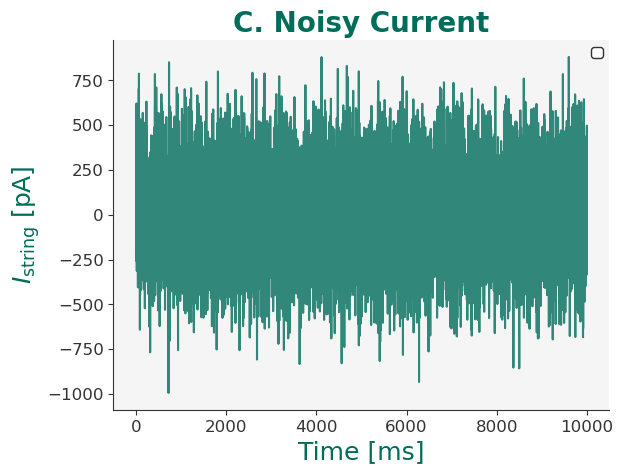

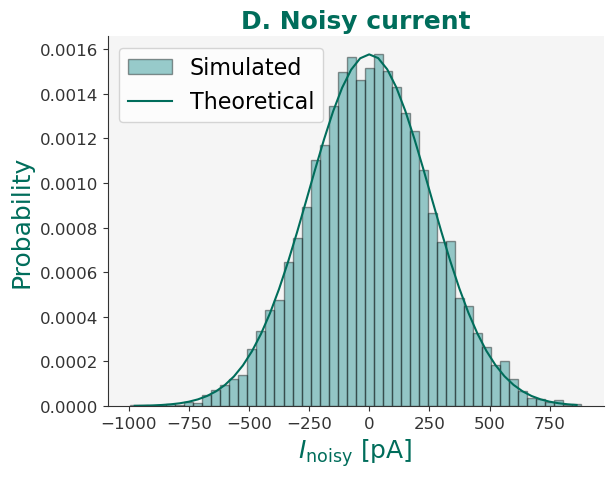

10000 10000


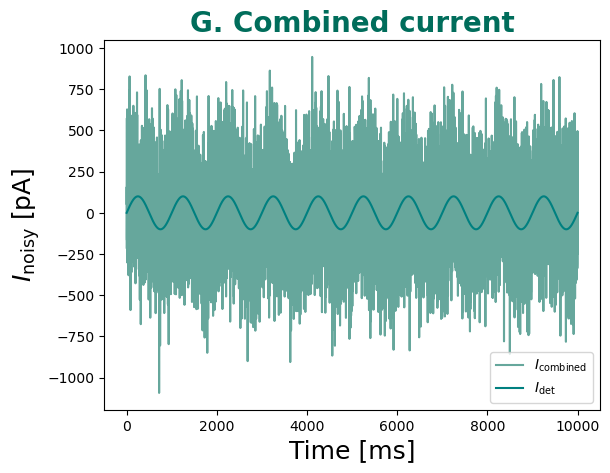

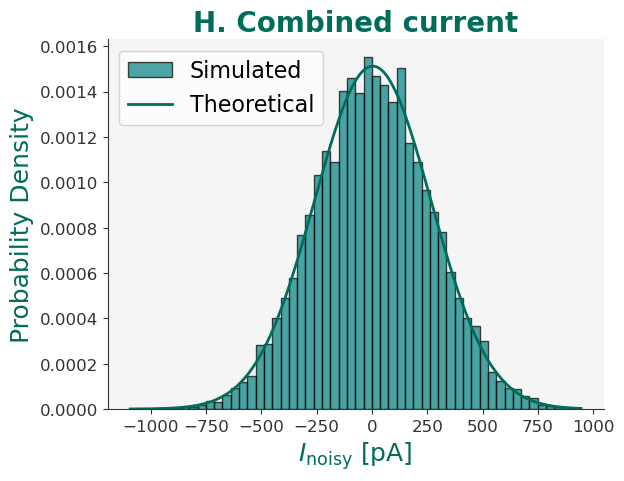

In [11]:

#-----------------Plot deterministic membrane potential--------------------

res2 = build_simulation(sim_time=1000,noisy=False, second_sine=False, a=100, f1=10, resolution=0.1)

Vm2 = res2["Vm"]
times2 = res2["times"]
bins=50

plt.plot(times2, Vm2, color=color)
plt.title("Z. Deterministic Membrane Potential", fontweight='bold', color="#006D5B", fontsize=20)
ax = plt.gca()
ax.set_facecolor("#F5F5F5")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#333333")
ax.spines["bottom"].set_color("#333333")
ax.xaxis.label.set_color("#006D5B")
ax.yaxis.label.set_color("#006D5B")
ax.set_xlabel("Time [ms]", fontsize=18)
ax.set_ylabel(r"$V_m [mV]$", fontsize=18)
ax.tick_params(axis='both', colors="#333333", labelsize='large')
#ax.legend(facecolor="white", framealpha=1, edgecolor="#333333")
save_path = os.getcwd() + "/results/plot_Vm_det.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

#-----------------Histogram of Deterministic Membrane Potential--------------------

plt.hist(Vm2, bins=50, density=True, color="teal", alpha=0.7, edgecolor="black")
plt.title("B. Deterministic Membrane Potential", fontsize=18, fontweight='bold', color="#006D5B")
plt.xlabel(r"$V_m$ [mV]", fontsize=18)
plt.ylabel("Probability Density", fontsize=18)

# Layout
ax = plt.gca()
ax.set_facecolor("#F5F5F5")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#333333")
ax.spines["bottom"].set_color("#333333")
ax.xaxis.label.set_color("#006D5B")
ax.yaxis.label.set_color("#006D5B")
ax.tick_params(axis='both', colors="#333333", labelsize='large')

# Save figure
save_path = os.getcwd() + "/results/hist_Vm_det.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()



nest.ResetKernel()
nest.SetKernelStatus({
    "resolution": 0.25
    })

I_det = nest.Create(
        "ac_generator",
        1,
        params=[
            {"amplitude": 100.0,"frequency": 10.0}
        ])

I_noise = nest.Create(
    "noise_generator",
    1, 
    params=[
            {"mean": 0.0, "std" : 253, "dt" : 0.5}
    ])    


properties = nest.GetStatus(I_det)
sim_time = 10000
#print(properties)

amplitude = properties[0]["amplitude"]
frequency = properties[0]["frequency"]
offset = properties[0]["offset"]
phase = properties[0]["phase"]



def I_d(t):
    """I(t) = offset + amplitude * sin(wt + phi)"""
    
    w = 2*math.pi * frequency
    phi = phase / 180 * math.pi
    
    return offset + amplitude * np.sin(w*t + phi)

def plot_I(string, sim_time, I, color):
    T = np.linspace(0,sim_time,sim_time)
    current = []
    [current.append(I(t)) for t in T]
    plt.figure()
    plt.plot(T, current, color=color, alpha=0.8)
    plt.xlabel("Time [ms]", fontsize=18)
    plt.ylabel(rf"$I_\mathrm{{string}}$ [pA]", fontsize=18)
    plt.title(f"{string} Current", fontsize=20, fontweight='bold', color="#006D5B")
   
    # Layout
    ax = plt.gca()
    ax.set_facecolor(facecolor)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("#333333")
    ax.spines["bottom"].set_color("#333333")
    ax.xaxis.label.set_color("#006D5B")
    ax.yaxis.label.set_color("#006D5B")
    ax.tick_params(axis='both', colors="#333333", labelsize='large')
    ax.legend(facecolor="white", framealpha=1, edgecolor="#333333")
    
    # Save figure
    save_path = os.getcwd() + f"/results/plot_{string}.png"
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()
    return T, current

times, current = plot_I("A. Deterministic", sim_time=sim_time, I=I_d, color="#006D5B")


my_seed = 42
nest.rng_seed = my_seed

neuron = nest.Create("iaf_psc_alpha")

multimeter = nest.Create(
"multimeter", 
params = {
    "interval": 0.25, "record_from": ["V_m"]
})   


# Setting parameters given in Fig 8.12. Tau_m = 10 ms by default.
V_thresh = 1e+9 #mV
E_m = -60 
C_m = 100 #pF
sim_time = 10000 #ms
I_e = 0
tau_m = 10


neuron.set(V_th = V_thresh)
neuron.set(V_m = E_m)
neuron.set(C_m = C_m)
neuron.set(V_reset = E_m)
neuron.set(E_L = E_m)
neuron.set(I_e = I_e)
neuron.set(tau_m = tau_m)

nest.Connect(I_noise, neuron)
nest.Connect(multimeter, neuron)

res = nest.Simulate(sim_time)
mm_data = multimeter.get("events")
V_m =  mm_data["V_m"]
times = mm_data["times"]

"""finner lekkasjeledningen for å sjekke om dette gjør at fordelingen av Vm blir left-skewed:"""
properties = neuron.get(["C_m", "tau_m"])

C_m = properties["C_m"]  
tau_m = properties["tau_m"]  

g_L = C_m / tau_m  
print(f"Lekkasjeledning g_L: {g_L:.4f} nS")

#-----------------Plot 
plt.plot(times, V_m, color="#006D5B")
plt.title("E. Noisy Membrane potential",  fontsize=20, fontweight='bold', color="#006D5B")
plt.xlabel("Time [ms]", fontsize=18)
plt.ylabel("Vm [mV] ", fontsize=18)
ax = plt.gca()
ax.set_facecolor("#F5F5F5")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#333333")
ax.spines["bottom"].set_color("#333333")
ax.xaxis.label.set_color("#006D5B")
ax.yaxis.label.set_color("#006D5B")
ax.tick_params(axis='both', colors="#333333", labelsize='large')
ax.legend(facecolor="white", framealpha=1, edgecolor="#333333")
save_path = os.getcwd() + "/results/noisy_mem_pot.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()




# Plotter histogram med 50 bins
plt.hist(V_m, bins=bins, density=True, alpha=0.5, edgecolor="black", color="#006D5B")
plt.title("Histogram of Membrane Potential", fontsize=20, fontweight='bold', color="#006D5B")
plt.xlabel("Membrane potential (mV)", fontsize=18)
plt.ylabel("Probability Density", fontsize=18)

ax = plt.gca()
ax.set_facecolor("#F5F5F5")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#333333")
ax.spines["bottom"].set_color("#333333")
ax.xaxis.label.set_color("#006D5B")
ax.yaxis.label.set_color("#006D5B")
ax.tick_params(axis='both', colors="#333333")
#ax.legend(facecolor="white", framealpha=1, edgecolor="#333333")

x = plt.gca() 
ax.set_facecolor(facecolor)
save_path = os.getcwd() + "/results/mem_pot_dist.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

print("Probability density of Membrane potential is somewhat left-skewed.")
print("This is due to the fact that the membrane potential is reset when threshold V_th is reached.")
print("When the potential reaches -55mV the potential is reset, and the distribution gets cut off")
print("The potential is then reset to V_reset and only goes slightly below this if noise current is negative")
    

"""I_noise"""

I_noise = nest.Create(
    "noise_generator",
    1, 
    params=[
            {"mean": 0.0, "std" : 253}
    ])

properties = nest.GetStatus(I_noise)

print(properties)
SD = properties[0]["std"]

def I_n(t):
    """I(t) = mu + N_j * sigma"""
    N_j = np.random.normal(0.0, SD)
    
    return N_j


#----------------Current distribution-----------------------


times, currents = plot_I("C. Noisy", sim_time=sim_time, I=I_n, color="#006D5B")

_, bin_edges, _ = plt.hist(currents, bins=bins, density=True, color="teal", alpha=0.4, edgecolor="black",
                          label="Simulated")
#ax = plt.gca() 
#ax.set_facecolor("seashell")
bins = 0.5 * (bin_edges[:-1] + bin_edges[1:])


def gaussian_distribution(bins, mu=0.0, sigma=50.0):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))


bin_width = bin_edges[1] - bin_edges[0] 
plt.plot(bins, gaussian_distribution(bins, mu=0.0, sigma=253), color='#006D5B',label = "Theoretical")
plt.title("D. Noisy current",  fontsize=18, fontweight='bold', color="#006D5B")
plt.xlabel(rf"$I_\mathrm{{noisy}}$ [pA]", fontsize=18)
plt.ylabel("Probability", fontsize=18)

ax = plt.gca()
ax.set_facecolor(facecolor)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#333333")
ax.spines["bottom"].set_color("#333333")
ax.xaxis.label.set_color("#006D5B")
ax.yaxis.label.set_color("#006D5B")
ax.tick_params(axis='both', colors="#333333", labelsize='large')
ax.legend(facecolor="white", framealpha=1, edgecolor="#333333")

plt.legend(fontsize=16)
save_path = os.getcwd() + "/results/current_dist.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()


#---------------Plot I_tot = I_det + I_noise--------------------
I_tot = []
print(len(current), len(currents))
for i,c in enumerate(current):
    I_tot.append(c+currents[i])
    
plt.plot(times, I_tot, color="#006D5B", alpha=0.6, label=r"$I_{\mathrm{combined}}$")
plt.plot(times, current, label=r"$I_{\mathrm{det}}$", color="teal")
plt.title("G. Combined current", color="#006D5B", fontweight="bold", fontsize=20)
plt.ylabel(rf"$I_\mathrm{{noisy}}$ [pA]", fontsize=18)
plt.xlabel("Time [ms]", fontsize=18)
plt.legend()

ax.set_facecolor(facecolor)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#333333")
ax.spines["bottom"].set_color("#333333")
ax.xaxis.label.set_color("#006D5B")
ax.yaxis.label.set_color("#006D5B")
ax.tick_params(axis='both', colors="#333333", labelsize='large')
ax.legend(facecolor="white", framealpha=1, edgecolor="#333333", fontsize=16)

save_path = os.getcwd() + f"/results/plot_I_tot.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")


plt.show()



#----------------HISTOGRAM I_TOT---------------------------

plt.hist(I_tot, bins=bins,  density=True, color="teal", alpha=0.7, edgecolor="black", label="Simulated")
plt.title("H. Combined current",  color="#006D5B", fontweight="bold", fontsize=20)
plt.xlabel(rf"$I_\mathrm{{noisy}}$ [pA]", fontsize=18)
plt.ylabel("Probability Density", fontsize=18)

mean_I_tot = np.mean(I_tot)
std_I_tot = np.std(I_tot)
x_vals = np.linspace(min(I_tot), max(I_tot), 500)
gaussian = norm.pdf(x_vals, loc=mean_I_tot, scale=std_I_tot)

# Plot teoretisk fordeling
plt.plot(x_vals, gaussian, color="#006D5B", linewidth=2, label="Theoretical")


#Layout
ax = plt.gca()
ax.set_facecolor(facecolor)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#333333")
ax.spines["bottom"].set_color("#333333")
ax.xaxis.label.set_color("#006D5B")
ax.yaxis.label.set_color("#006D5B")
ax.tick_params(axis='both', colors="#333333", labelsize='large')
#ax.legend(facecolor="white", framealpha=1, edgecolor="#333333")
ax.legend(fontsize=16)

# Save figure
save_path = os.getcwd() + f"/results/hist_I_tot.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()



    

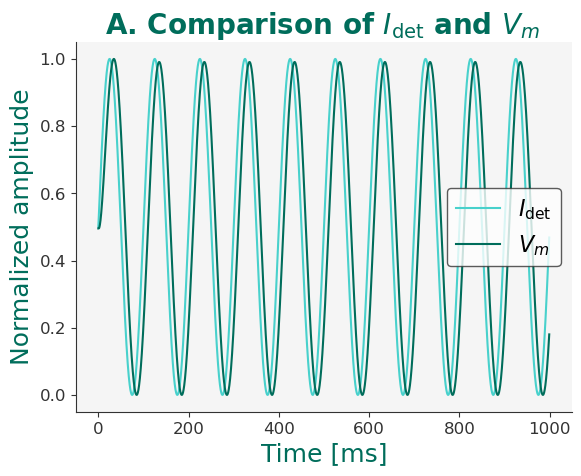

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Sørg for at både current og Vm2 har samme lengde og oppløsning
min_len = min(len(current), len(Vm2))
current_trimmed = np.array(current[:min_len])
Vm2_trimmed = np.array(Vm2[:min_len])
times_trimmed = np.array(times2[:min_len])

# Normalisering (0–1 skala)
scaler = MinMaxScaler()
current_norm = scaler.fit_transform(current_trimmed.reshape(-1, 1)).flatten()
Vm2_norm = scaler.fit_transform(Vm2_trimmed.reshape(-1, 1)).flatten()

# Plot
plt.figure()
plt.plot(times_trimmed, current_norm, label=r"$I_{\mathrm{det}}$", color="mediumturquoise")
plt.plot(times_trimmed, Vm2_norm, label="$V_m$", color="#006D5B")
plt.xlabel("Time [ms]", fontsize=18)
plt.ylabel("Normalized amplitude", fontsize=18)
plt.title("A. Comparison of $I_{\mathrm{det}}$ and $V_m$ ",
          fontsize=20, fontweight='bold', color="#006D5B")

# Layout
ax = plt.gca()
ax.set_facecolor("#F5F5F5")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#333333")
ax.spines["bottom"].set_color("#333333")
ax.xaxis.label.set_color("#006D5B")
ax.yaxis.label.set_color("#006D5B")
ax.tick_params(axis='both', colors="#333333", labelsize='large')
ax.legend(edgecolor="#333333", fontsize=16)

# Lagre figur
save_path = os.getcwd() + "/results/norm_I_Vm_det.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

In [22]:
import math 
from scipy.stats import norm

def calculate_SD(tau_si, C_m_si, SD_Vm, delta):
    SD_si = math.sqrt( (2 * C_m_si**2 * SD_Vm**2) / (delta * tau_si ))
    SD = SD_si / (1e-12)
    return SD

def SD_hist(N, a, f, sim_time, V_thresh=-50, E_m=-60, plot=True):
    std_values = []
    
    sd = calculate_SD(tau_si=10*1e-3, C_m_si=100*1e-12, SD_Vm=4*1e-3, delta=5e-4)
    for i in range(N):
        #print("SD:", sd)
        res = build_simulation(sim_time=sim_time, noisy=True,
                  f1=f, a=a, SD=sd,
                  V_thresh=V_thresh, E_m=E_m,
                  seed=np.random.randint(0,1e+6), resolution=0.25)
        #print(res["Vm"])
        std_values.append(np.std(res["Vm"]))
        
    std_values = np.array(std_values).flatten()
    std_of_std = np.std(std_values)
    
   # print("Shapiro-Wilk test of Vm:", shapiro(res["Vm"]))
    
    if plot:
        
        Vm = res["Vm"]
        mean_Vm = np.mean(Vm)
        std_Vm = np.std(Vm)
        
        plt.hist(res["Vm"],bins=50, density=True, edgecolor='black', color="#006D5B", alpha=0.6)
        plt.title(f"F. Membrane potential $(V_{{m}} = {np.mean(res['Vm']):.0f},\ \sigma = {np.std(res['Vm']):.1f} \pm {std_of_std:.1f})$", 
 fontsize=17, fontweight='bold', color="#006D5B") 
        
        x_vals = np.linspace(min(Vm), max(Vm), 500)
        gaussian = norm.pdf(x_vals, loc=mean_Vm, scale=std_Vm)
        plt.plot(x_vals, gaussian, color="mediumturquoise", linewidth=2, label="Theoretical Normal dist")

        plt.ylabel("Probability Density", fontsize=18)
        plt.xlabel("Membrane Potential (mV)", fontsize=18)
    
        
        ax = plt.gca()
        ax.set_facecolor("#F5F5F5")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_color("#333333")
        ax.spines["bottom"].set_color("#333333")
        ax.xaxis.label.set_color("#006D5B")
        ax.yaxis.label.set_color("#006D5B")
        ax.tick_params(axis='both', colors="#333333", labelsize='large')
        ax.legend(edgecolor="#333333", fontsize=16)
                       
        path = os.getcwd() + "/results/c1_hist.png"
        plt.savefig(path, dpi=300, bbox_inches="tight")
        

       


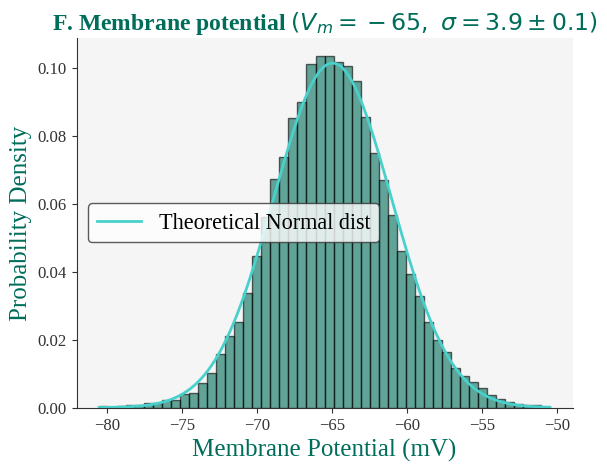

In [23]:
SD_hist(N=100, a=0, f=10, sim_time=10000, V_thresh=20, E_m=-65, plot=True)

Resultatdel: Lage kollasj med flere av disse figurene. 

Trenger vel egentlig ikke kjøre flere simuleringer..

In [16]:
import math 

def calculate_SD(tau_si, C_m_si, SD_Vm, delta):
    SD_si = math.sqrt( (2 * C_m_si**2 * SD_Vm**2) / (delta * tau_si ))
    SD = SD_si / (1e-12)
    return SD

def SD_hist(a, f, sim_time, V_thresh=-50, E_m=-60, plot=True):
    
    sd = calculate_SD(tau_si=10*1e-3, C_m_si=100*1e-12, SD_Vm=4*1e-3, delta=5e-4)
    
    res = build_simulation(sim_time=sim_time, noisy=True,
                  f1=f, a=a, SD=sd,
                  V_thresh=V_thresh, E_m=E_m,
                  seed=np.random.randint(0,1e+6), resolution=0.25)
    
    
    if plot:
        plt.rcParams["font.family"] = "Liberation Serif"
        plt.hist(res["Vm"],bins=bins, density=True, edgecolor='black', color="#006D5B")
        plt.title(f"F. Noisy Membrane Potential  ($\mu={np.mean(res['Vm']):.1f}$ mV, $\sigma={np.std(res['Vm']):.1f}$ mV)", fontsize=12, 
                  fontweight='bold', color="#006D5B")
        plt.ylabel("Probability density")
        plt.xlabel("$V_m$ [mV]")
        ax = plt.gca()
        ax.set_facecolor("#F5F5F5")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_color("#333333")
        ax.spines["bottom"].set_color("#333333")
        ax.xaxis.label.set_color("#006D5B")
        ax.yaxis.label.set_color("#006D5B")
        ax.tick_params(axis='both', colors="#333333")
        ax.legend(facecolor="white", framealpha=1, edgecolor="#333333")
        
        path = os.getcwd() + "/results/c1_hist.png"
        plt.savefig(path, dpi=300, bbox_inches="tight")
        plt.show()
        
       
        
      
    


In [ ]:
def firing_rate(sim_time, N=1):
   # spike_rates = []
   # for i in range(N):
    res = build_simulation(sim_time=sim_time, second_sine=False, noisy=True, 
                  f1=10.0, a=100.0, SD=253.0,
                  V_thresh=0.0, E_m=-60.0, tau_m=10,
                  seed=np.random.randint(0,1e+6), beat=2, resolution=0.25)

    Vm = res["Vm"]
    plt.hist(Vm, bins=50, density=True, edgecolor="black", color="#006D5B", label="Simulated", alpha=0.8)
    plt.title("I.Combined Membrane potential", fontweight='bold', color="#006D5B", fontsize=20)
    
    from scipy.stats import norm
    
    mean_Vm = np.mean(Vm)
    std_Vm = np.std(Vm)
    x_vals = np.linspace(min(Vm), max(Vm), 500)
    gaussian = norm.pdf(x_vals, loc=mean_Vm, scale=std_Vm)
    plt.plot(x_vals, gaussian, color="mediumturquoise", linewidth=2, label="Theoretical")

    ax = plt.gca()
    ax.set_facecolor("#F5F5F5")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("#333333")
    ax.spines["bottom"].set_color("#333333")
    ax.xaxis.label.set_color("#006D5B")
    ax.yaxis.label.set_color("#006D5B")
    ax.tick_params(axis='both', colors="#333333", labelsize='large')
    ax.set_xlabel(f"$V_m$ [mV]", fontsize=18)
    ax.set_ylabel("Probability density", fontsize=18)
    ax.legend(fontsize=16)

    #ax.legend(facecolor="white", framealpha=1, edgecolor="#333333")
    
    path = os.getcwd() + "/results/hist_Vm_I_tot.png"
    plt.savefig(path, dpi=300, bbox_inches="tight")
    plt.show()
    
       
    return Vm
        

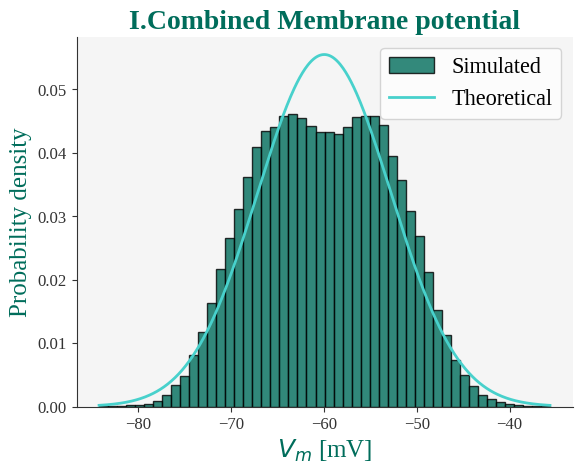

In [19]:
from scipy import stats

Vm = firing_rate(100e3,1000)



In [ ]:
print("Normaltest of spike rates:", stats.normaltest(sr))
print("Normaltest of spike rates:", stats.normaltest(Vm))

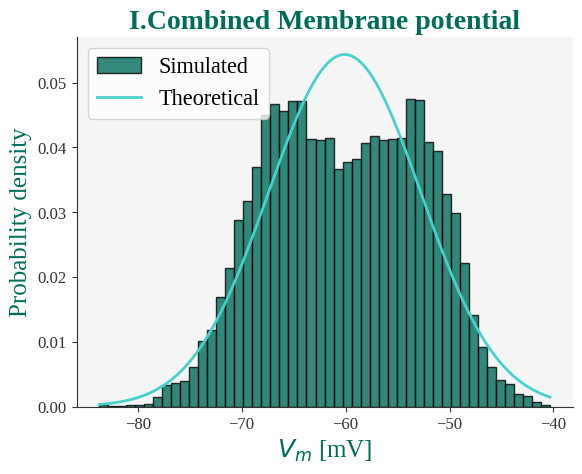

array([-60.        , -60.        , -60.        , ..., -66.19536433,
       -66.04963145, -67.76399338])

In [20]:
firing_rate(sim_time=5e3)